In [1]:
from rxntools.reaction import ChemicalReaction
from rxntools.template import ReactionTemplate
from rxntools.smiles import CombineMols
import rdkit.Chem.AllChem as Chem

# Example 1

The problem lies in the chirality of atom 19 in the reactant. It is bonded to N: 17, C: 20, C: 23 and H. The order of their appearance in the reaction smarts is N: 17, H, C: 20, C: 23. @@ means that if you look from the direction of N: 17 to C: 19, H, C: 20, C: 23 should be arranged clockwise. But in RDKit, it is parsed counter clockwisely. (Therefore, this reaction smarts is correctly parsed in RDKit, but not in rxntools. A reaction smarts that is correct in both RDKit and rxntools are provided in the end of this example.)

In [2]:
rs = 'Cl.[CH3:43][CH2:42][S:44](=[O:45])(=[O:46])Cl.[CH3:39][N:14]([C:15](=[O:16])[N:17]([CH3:18])[C@@H:19]1[CH2:20][N:21]([C:31](=[O:32])[CH:33]2[CH2:34][CH2:35][NH:36][CH2:37][CH2:38]2)[CH2:22][C@H:23]1[c:24]1[cH:25][cH:26][c:27]([F:30])[cH:28][cH:29]1)[c:6]1[cH:7][c:8]([C:10]([F:11])([F:12])[F:13])[cH:9][c:4]([C:3]([F:40])([F:41])[F:2])[cH:5]1>>[CH3:43][CH2:42][S:44](=[O:45])(=[O:46])[N:36]1[CH2:35][CH2:34][CH:33]([C:31](=[O:32])[N:21]2[CH2:22][C@@H:23]([c:24]3[cH:29][cH:28][c:27]([F:30])[cH:26][cH:25]3)[C@H:19]([N:17]([CH3:18])[C:15](=[O:16])[N:14]([CH3:39])[c:6]3[cH:7][c:8]([C:10]([F:12])([F:11])[F:13])[cH:9][c:4]([C:3]([F:40])([F:2])[F:41])[cH:5]3)[CH2:20]2)[CH2:38][CH2:37]1'
print(rs)

Cl.[CH3:43][CH2:42][S:44](=[O:45])(=[O:46])Cl.[CH3:39][N:14]([C:15](=[O:16])[N:17]([CH3:18])[C@@H:19]1[CH2:20][N:21]([C:31](=[O:32])[CH:33]2[CH2:34][CH2:35][NH:36][CH2:37][CH2:38]2)[CH2:22][C@H:23]1[c:24]1[cH:25][cH:26][c:27]([F:30])[cH:28][cH:29]1)[c:6]1[cH:7][c:8]([C:10]([F:11])([F:12])[F:13])[cH:9][c:4]([C:3]([F:40])([F:41])[F:2])[cH:5]1>>[CH3:43][CH2:42][S:44](=[O:45])(=[O:46])[N:36]1[CH2:35][CH2:34][CH:33]([C:31](=[O:32])[N:21]2[CH2:22][C@@H:23]([c:24]3[cH:29][cH:28][c:27]([F:30])[cH:26][cH:25]3)[C@H:19]([N:17]([CH3:18])[C:15](=[O:16])[N:14]([CH3:39])[c:6]3[cH:7][c:8]([C:10]([F:12])([F:11])[F:13])[cH:9][c:4]([C:3]([F:40])([F:2])[F:41])[cH:5]3)[CH2:20]2)[CH2:38][CH2:37]1


In [3]:
# load ChemicalReaction object from rxntools good smarts
cr = ChemicalReaction(rs)
good_smarts = cr.Smarts
cr = ChemicalReaction(good_smarts)
cr.Check()

In [4]:
# chirality error when extract reaction template.
cr.ExtractTemplate()

RuntimeError: For chemical reaction:
Cl[S:44]([CH2:42][CH3:43])(=[O:45])=[O:46].[F:2][C:3]([c:4]1[cH:5][c:6]([N:14]([C:15](=[O:16])[N:17]([CH3:18])[CH;@@:19]2[CH2:20][N:21]([C:31](=[O:32])[CH:33]3[CH2:34][CH2:35][NH:36][CH2:37][CH2:38]3)[CH2:22][CH;@:23]2[c:24]2[cH:25][cH:26][c:27]([F:30])[cH:28][cH:29]2)[CH3:39])[cH:7][c:8]([C:10]([F:11])([F:12])[F:13])[cH:9]1)([F:40])[F:41]>Cl>[F:2][C:3]([c:4]1[cH:5][c:6]([N:14]([C:15](=[O:16])[N:17]([CH3:18])[CH;@:19]2[CH2:20][N:21]([C:31](=[O:32])[CH:33]3[CH2:34][CH2:35][N:36]([S:44]([CH2:42][CH3:43])(=[O:45])=[O:46])[CH2:37][CH2:38]3)[CH2:22][CH;@:23]2[c:24]2[cH:25][cH:26][c:27]([F:30])[cH:28][cH:29]2)[CH3:39])[cH:7][c:8]([C:10]([F:11])([F:12])[F:13])[cH:9]1)([F:40])[F:41]
and extracted reaction template:
([C:34]-[C&H2;D2;+0:35]-[N&H1;D2;+0:36]-[C&H2;D2;+0:37]-[C:38]).([Cl;D1;H0]-[S;H0;D4;+0:44](-[C:42])(=[O;D1;H0:45])=[O;D1;H0:46])>>([C:34]-[C&H2;D2;+0:35]-[N;H0;D3;+0:36](-[C&H2;D2;+0:37]-[C:38])-[S;H0;D4;+0:44](-[C:42])(=[O;D1;H0:45])=[O;D1;H0:46])
The true products:
CCS(=O)(=O)N1CCC(C(=O)N2C[C@](c3ccc(F)cc3)[C@](N(C)C(=O)N(C)c3cc(C(F)(F)F)cc(C(F)(F)F)c3)C2)CC1
not in the products obtained by running the template
['CCS(=O)(=O)N1CCC(C(=O)N2C[C@](c3ccc(F)cc3)[C@@](N(C)C(=O)N(C)c3cc(C(F)(F)F)cc(C(F)(F)F)c3)C2)CC1', 'CCS(=O)(=O)N1CCC(C(=O)N2C[C@](c3ccc(F)cc3)[C@@](N(C)C(=O)N(C)c3cc(C(F)(F)F)cc(C(F)(F)F)c3)C2)CC1', 'CCS(=O)(=O)N1CCC(C(=O)N2C[C@](c3ccc(F)cc3)[C@@](N(C)C(=O)N(C)c3cc(C(F)(F)F)cc(C(F)(F)F)c3)C2)CC1', 'CCS(=O)(=O)N1CCC(C(=O)N2C[C@](c3ccc(F)cc3)[C@@](N(C)C(=O)N(C)c3cc(C(F)(F)F)cc(C(F)(F)F)c3)C2)CC1']

In [5]:
corrected_reaction_smarts = cr.Smarts.replace(';@:19', ';@@:19')
print(corrected_reaction_smarts)

Cl[S:44]([CH2:42][CH3:43])(=[O:45])=[O:46].[F:2][C:3]([c:4]1[cH:5][c:6]([N:14]([C:15](=[O:16])[N:17]([CH3:18])[CH;@@:19]2[CH2:20][N:21]([C:31](=[O:32])[CH:33]3[CH2:34][CH2:35][NH:36][CH2:37][CH2:38]3)[CH2:22][CH;@:23]2[c:24]2[cH:25][cH:26][c:27]([F:30])[cH:28][cH:29]2)[CH3:39])[cH:7][c:8]([C:10]([F:11])([F:12])[F:13])[cH:9]1)([F:40])[F:41]>Cl>[F:2][C:3]([c:4]1[cH:5][c:6]([N:14]([C:15](=[O:16])[N:17]([CH3:18])[CH;@@:19]2[CH2:20][N:21]([C:31](=[O:32])[CH:33]3[CH2:34][CH2:35][N:36]([S:44]([CH2:42][CH3:43])(=[O:45])=[O:46])[CH2:37][CH2:38]3)[CH2:22][CH;@:23]2[c:24]2[cH:25][cH:26][c:27]([F:30])[cH:28][cH:29]2)[CH3:39])[cH:7][c:8]([C:10]([F:11])([F:12])[F:13])[cH:9]1)([F:40])[F:41]


# Example 2

The reaction with symmetric reactants, the same atom map number exists more than once is considered bad reaction smarts in rxntools.

In [6]:
rs = 'CCN(CC)CC.[CH3:16][C:15]([CH3:17])([CH3:18])[O:14][C:12](=[O:13])O[C:12](=[O:13])[O:14][C:15]([CH3:16])([CH3:17])[CH3:18].[NH2:11][CH2:10][CH2:9][n:6]1[cH:7][cH:8][c:4]([N+:1](=[O:2])[O-:3])[n:5]1>ClCCl>[CH3:16][C:15]([CH3:17])([CH3:18])[O:14][C:12](=[O:13])[NH:11][CH2:10][CH2:9][n:6]1[cH:7][cH:8][c:4]([N+:1](=[O:2])[O-:3])[n:5]1'
print(rs)

CCN(CC)CC.[CH3:16][C:15]([CH3:17])([CH3:18])[O:14][C:12](=[O:13])O[C:12](=[O:13])[O:14][C:15]([CH3:16])([CH3:17])[CH3:18].[NH2:11][CH2:10][CH2:9][n:6]1[cH:7][cH:8][c:4]([N+:1](=[O:2])[O-:3])[n:5]1>ClCCl>[CH3:16][C:15]([CH3:17])([CH3:18])[O:14][C:12](=[O:13])[NH:11][CH2:10][CH2:9][n:6]1[cH:7][cH:8][c:4]([N+:1](=[O:2])[O-:3])[n:5]1


In [7]:
# load ChemicalReaction object from rxntools good smarts
cr = ChemicalReaction(rs)
good_smarts = cr.Smarts
cr = ChemicalReaction(good_smarts)
cr.Check()

In [8]:
# atom map number error when extract reaction template.
cr.ExtractTemplate()

AssertionError: 

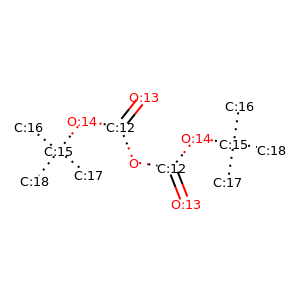

In [9]:
Chem.Draw.MolToImage(cr.reactants[0], size=(300,300))